**Hand Gesture Detection assignment**



   Instruction/Hints are mentioned, to run the cell you have to do shift+enter



In [ ]:
!pip install opendatasets
!pip install keras
!pip install tensorflow
!pip install rasa==1.1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.2/447.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.2/516.2 kB 10.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of rasa to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following versions that require a different python version: 1.10.10 Requires-Python >=3.6,<3.8; 1.10.11 Requires-Python >=3.6,<3.8; 1.10.12 Requires-Python >=3.6,<3.8; 1.10.13 Requires-Python >=3.6,<3.8; 1.10.14 Requires-Python >=3.6,<3.8; 1.10.15 Requires-Python >=3.6,<3.8; 1.10.16 Requires-Python >=3.6,<3.8; 1.10.17 Requires-Python >=3.6,<3.8; 1

In [ ]:
# Import all the necessary dependcies

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

You will have to make an account on kaggle and will have to use that 'username' and key.

In [ ]:
# Download the dataset from kaggle


import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/koryakinp/fingers")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shrasti
Your Kaggle Key: ··········


100%|██████████| 363M/363M [00:04<00:00, 85.7MB/s]


In [ ]:
import os
import cv2
import numpy as np

# Path to the dataset directory
dataset_dir = '/content/fingers/test'

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):
    # Load the image using OpenCV
    img_path = os.path.join(dataset_dir, filename)
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE);
    # Resize the image to a desired size (e.g., 64x64)
    img = cv2.resize(img, (64, 64))

    # Append the image to the images list
    images.append(img)

    # Get the label from the filename (the first character)
    label = filename[-6:-5:]

    # Append the label to the labels list
    labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
labels = labels.astype(int)
x_test=images
y_test=labels


In [ ]:
import os
import cv2
import numpy as np

# Path to the dataset directory
dataset_dir = '/content/fingers/train'

# Initialize lists to store images and labels
images2 = []
labels2 = []

# Iterate through each image file
for filename in os.listdir(dataset_dir):
    # Load the image using OpenCV
    img_path = os.path.join(dataset_dir, filename)
    #img=cv2.imread(img_path)
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    # Resize the image to a desired size (e.g., 64x64)
    img = cv2.resize(img, (64, 64))

    # Append the image to the images list
    images2.append(img)

    # Get the label from the filename (the first character)
    label = filename[-6:-5:]

    # Append the label to the labels list
    labels2.append(label)

# Convert the lists to NumPy arrays
images2 = np.array(images2)
labels2 = np.array(labels2)
labels2 = labels2.astype(int)
x_train=images2
y_train=labels2



In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
from tensorflow.keras.utils import to_categorical


Y_train = to_categorical(y_train, num_classes=6)

Y_test = to_categorical(y_test, num_classes=6)

In [ ]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: [0 1 2 3 4 5]
Unique values in y_test: [0 1 2 3 4 5]


In [ ]:
print ("Y_train shape: " + str(Y_train.shape))
print ("Y_test shape: " + str(Y_test.shape))

Y_train shape: (18000, 6)
Y_test shape: (3600, 6)


In [ ]:
# MAKE YOUR CNN MODEL HERE

def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)
    model = tf.keras.models.Sequential()

    # CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    model.add(tfl.Conv2D(8, (4, 4), strides=(1, 1), padding='SAME', input_shape=input_shape))

    # Apply RELU to previous layer
    model.add(tfl.Activation('relu'))

    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    model.add(tfl.MaxPooling2D((8, 8), strides=(8, 8), padding='SAME'))

    # CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    model.add(tfl.Conv2D(16, (2, 2), strides=(1, 1), padding='SAME'))

    # RELU
    model.add(tfl.Activation('relu'))

    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    model.add(tfl.MaxPooling2D((4, 4), strides=(4, 4), padding='SAME'))

    # FLATTEN
    model.add(tfl.Flatten())

    # Dense layer
    # 6 neurons in the output layer. Hint: one of the arguments should be "activation='softmax'"
    model.add(tfl.Dense(6, activation='softmax'))

    return model

# Define the input shape, for example (64, 64, 3) for a 64x64 RGB image input_shape = (64, 64, 3)

# Create the model cnn_model = convolutional_model(input_shape)

# Display the model summary cnn_model.summary()


In [ ]:
# COMPILE YOUR MODEL HERE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy


conv_model = convolutional_model((64, 64,1))
conv_model.compile(optimizer=Adam(lr=0.001),
                  loss=categorical_crossentropy,
                  metrics=[categorical_accuracy])
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         136       
                                                                 
 activation_2 (Activation)   (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 activation_3 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 16)          0         
 g2D)                                                 

In [ ]:
# SLICE THE DATASET FOR 1800 IMAGES FOR TRAINING AND 300 FOR TESTING, ALSO MENTION THE BATCH SIZE


train_dataset = tf.data.Dataset.from_tensor_slices((x_train[:1800:], Y_train[:1800:]))
train_dataset = train_dataset.batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test[:300:], Y_test[:300:]))
test_dataset = test_dataset.batch(32)


In [ ]:
# TWEAK THE NUMBER OF IMAGES TO GET BETTER RESULTS

history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
57/57 [==============================] - 3s 46ms/step - loss: 1.5397 - categorical_accuracy: 0.5939 - val_loss: 1.1923 - val_categorical_accuracy: 0.6500
Epoch 2/100
57/57 [==============================] - 4s 68ms/step - loss: 1.0684 - categorical_accuracy: 0.6894 - val_loss: 0.8662 - val_categorical_accuracy: 0.7467
Epoch 3/100
57/57 [==============================] - 3s 46ms/step - loss: 0.8262 - categorical_accuracy: 0.7472 - val_loss: 0.6863 - val_categorical_accuracy: 0.7967
Epoch 4/100
57/57 [==============================] - 2s 43ms/step - loss: 0.6647 - categorical_accuracy: 0.7906 - val_loss: 0.5709 - val_categorical_accuracy: 0.8233
Epoch 5/100
57/57 [==============================] - 3s 53ms/step - loss: 0.5477 - categorical_accuracy: 0.8183 - val_loss: 0.4758 - val_categorical_accuracy: 0.8533
Epoch 6/100
57/57 [==============================] - 3s 46ms/step - loss: 0.4580 - categorical_accuracy: 0.8522 - val_loss: 0.3982 - val_categorical_accuracy: 0.8733
Epoc

PLOT YOUR RESULTS HERE


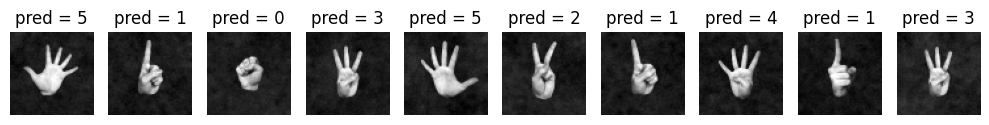

In [ ]:
import random
import cv2
from matplotlib import pyplot as plt

numbers = list(range(1, 1001))
random_array = random.sample(numbers, 10)

fig = plt.figure(figsize=(10, 7))

for i, idx in enumerate(random_array):
    img_resized = cv2.resize(x_test[idx], (64, 64))
    y_pred = np.argmax(conv_model.predict(np.expand_dims(x_test[idx], axis=0),verbose=0))
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(img_resized, cmap='gray')
    ax.axis('off')
    ax.set_title("pred = " + str(y_pred))

plt.tight_layout()
plt.show()